In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## BigQuery DataFrame Visualization Tutorials

<table align="left">

  <td>
    <a href="https://colab.research.google.com/github/googleapis/python-bigquery-dataframes/blob/main/notebooks/visualization/tutorial.ipynb">
      <img src="https://raw.githubusercontent.com/googleapis/python-bigquery-dataframes/refs/heads/main/third_party/logo/colab-logo.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/googleapis/python-bigquery-dataframes/tree/main/notebooks/visualization/tutorial.ipynb">
      <img src="https://raw.githubusercontent.com/googleapis/python-bigquery-dataframes/refs/heads/main/third_party/logo/github-logo.png" width="32" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/googleapis/python-bigquery-dataframes/tree/main/notebooks/visualization/tutorial.ipynb">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTW1gvOovVlbZAIZylUtf5Iu8-693qS1w5NJw&s" alt="BQ logo" width="35">
      Open in BQ Studio
    </a>
  </td>
</table>

This notebook provides tutorials for all plotting methods that BigQuery DataFrame offers. You will visualize different datasets with histograms, line charts, area charts, bar charts, and scatter plots.

# Before you begin

## Set up your project ID and region

This step makes sure that you will access the target dataset with the correct auth profile.

In [2]:
PROJECT_ID = "bigframes-dev"  # @param {type:"string"}
REGION = "US"  # @param {type: "string"}

In [3]:
import bigframes.pandas as bpd

bpd.options.bigquery.project = PROJECT_ID
bpd.options.bigquery.location = REGION

You can also turn on the partial ordering mode for faster data processing.

In [4]:
bpd.options.bigquery.ordering_mode = 'partial'

# Histogram

You will use the penguins public dataset in this example. First, you take a look at the shape of this data:

In [5]:
penguins = bpd.read_gbq('bigquery-public-data.ml_datasets.penguins')
penguins.peek()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),Dream,36.6,18.4,184.0,3475.0,FEMALE
1,Adelie Penguin (Pygoscelis adeliae),Dream,39.8,19.1,184.0,4650.0,MALE
2,Adelie Penguin (Pygoscelis adeliae),Dream,40.9,18.9,184.0,3900.0,MALE
3,Chinstrap penguin (Pygoscelis antarctica),Dream,46.5,17.9,192.0,3500.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Dream,37.3,16.8,192.0,3000.0,FEMALE


You want to draw a histogram about the distribution of culmen lengths:

<Axes: ylabel='Frequency'>

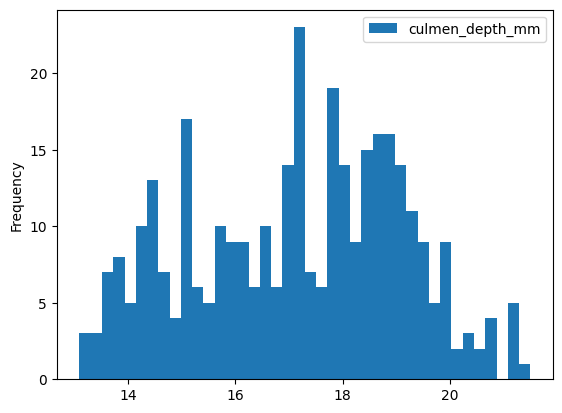

In [6]:
penguins['culmen_depth_mm'].plot.hist(bins=40)

# Line Chart

In this example you will use the NOAA public dataset.

In [7]:
noaa_surface = bpd.read_gbq("bigquery-public-data.noaa_gsod.gsod2021")
noaa_surface.peek()

,stn,wban,date,year,mo,da,temp,count_temp,dewp,count_dewp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,010030,99999,2021-11-10,2021,11,10,26.4,4,17.9,4,...,<NA>,0.0,I,999.9,0,0,0,0,0,0
1,010030,99999,2021-02-01,2021,02,01,8.9,4,0.5,4,...,<NA>,2.76,G,999.9,0,0,0,0,0,0
2,010060,99999,2021-07-22,2021,07,22,34.4,4,9999.9,0,...,<NA>,0.0,I,999.9,0,0,0,0,0,0
3,010070,99999,2021-04-05,2021,04,05,17.9,4,6.4,4,...,<NA>,0.0,I,999.9,0,0,0,0,0,0
4,010070,99999,2021-02-04,2021,02,04,19.1,4,9999.9,0,...,<NA>,0.0,I,999.9,0,0,0,0,0,0


You are going to plot a line chart of temperatures by date. The original dataset contains many rows for a single date, and you wan to coalesce them with their median values.

In [8]:
noaa_surface_median_temps=noaa_surface[['date', 'temp']].groupby('date').median()
noaa_surface_median_temps.peek()

,temp
date,
2021-02-12,24.6
2021-02-11,25.9
2021-02-13,30.4
2021-02-14,32.1
2021-01-09,32.9


<Axes: xlabel='date'>

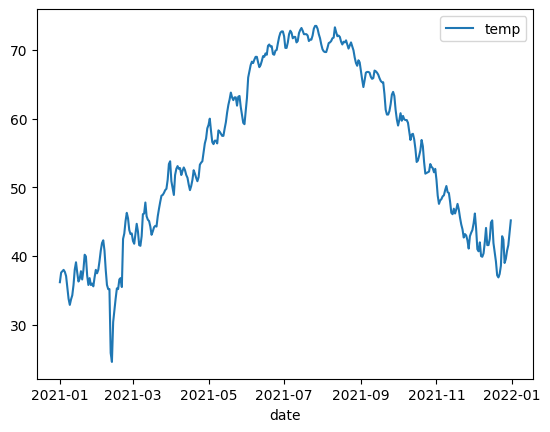

In [9]:
noaa_surface_median_temps.plot.line()

# Area Chart

In this example you will use the table that tracks the popularity of names in the USA.

In [10]:
usa_names = bpd.read_gbq("bigquery-public-data.usa_names.usa_1910_2013")
usa_names.peek()

,state,gender,year,name,number
0,AL,F,1910,Sadie,40
1,AL,F,1910,Mary,875
2,AR,F,1910,Vera,39
3,AR,F,1910,Marie,78
4,AR,F,1910,Lucille,66


You want to visualize the trends of the popularities of three names in US history: Mary, Emily and Lisa.

In [11]:
name_counts = usa_names[usa_names['name'].isin(('Mary', 'Emily', 'Lisa'))].groupby(('year', 'name'))['number'].sum()
name_counts = name_counts.unstack(level=1).fillna(0)
name_counts.peek()


name,Emily,Lisa,Mary
year,,,
1927,1631,0,70864
1918,2353,0,67492
1912,1126,0,32375
1923,2047,0,71799
1933,1036,0,55769


<Axes: xlabel='year'>

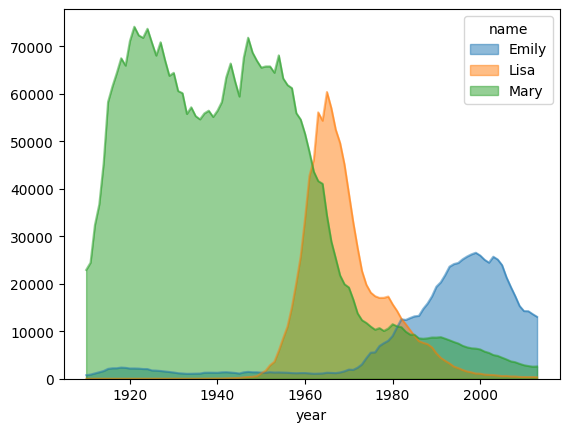

In [12]:
name_counts.plot.area(stacked=False, alpha=0.5)

You can also use set `subplots` to `True` to draw separate graphs for each column.

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>], dtype=object)

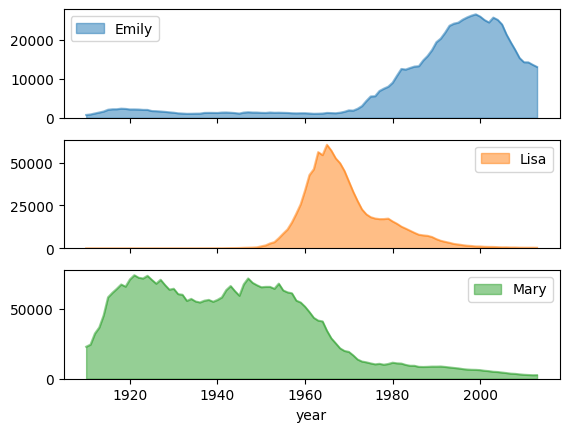

In [13]:
name_counts.plot.area(subplots=True, alpha=0.5)

# Bar Chart

Bar Charts are suitable for analyzing categorical data. For example, you are going to check the sex distribution of the penguin data:

<Axes: xlabel='sex'>

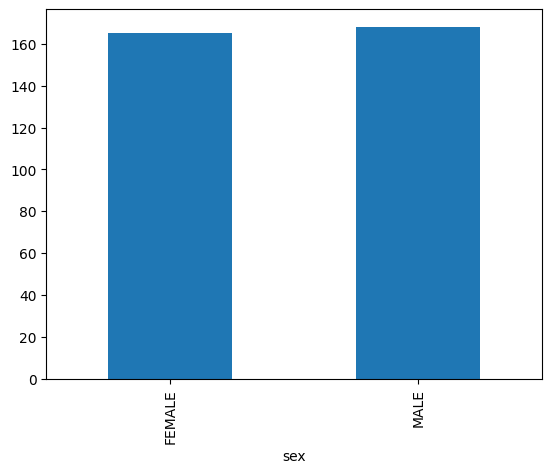

In [14]:
penguin_count_by_sex = penguins[penguins['sex'].isin(("MALE", "FEMALE"))].groupby('sex')['species'].count()
penguin_count_by_sex.plot.bar()

# Scatter Plot

In this example, you will explore the relationship between NYC taxi fares and trip distances.

In [15]:
taxi_trips = bpd.read_gbq('bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2021').dropna()
taxi_trips.peek()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2021-09-19 10:25:05+00:00,2021-09-19 10:25:10+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,264,264,2021,9
1,2,2021-09-20 14:53:02+00:00,2021-09-20 14:53:23+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,193,193,2021,9
2,1,2021-09-14 12:01:02+00:00,2021-09-14 12:07:19+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,170,170,2021,9
3,2,2021-09-12 10:40:32+00:00,2021-09-12 10:41:26+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,193,193,2021,9
4,1,2021-09-25 11:57:21+00:00,2021-09-25 11:58:32+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,95,95,2021,9


First, you santize the data a bit by remove outliers and pathological datapoints:

In [16]:
taxi_trips = taxi_trips[taxi_trips['trip_distance'].between(0, 10, inclusive='right')]
taxi_trips = taxi_trips[taxi_trips['fare_amount'].between(0, 50, inclusive='right')]

You also need to sort the data before plotting if you have turned on the partial ordering mode during the setup stage.

In [17]:
taxi_trips = taxi_trips.sort_values('pickup_datetime')

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

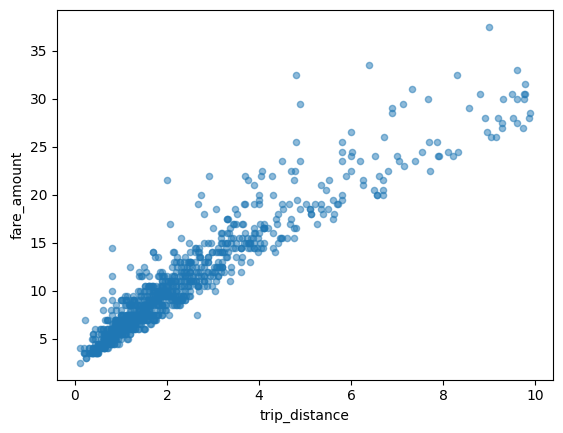

In [18]:
taxi_trips.plot.scatter(x='trip_distance', y='fare_amount', alpha=0.5)

# Advacned Plotting with Pandas/Matplotlib Parameters

Because BigQuery DataFrame's plotting library is powered by Matplotlib and Pandas, you are able to pass in more parameters to fine tune your graph like what you do with Pandas. 

In the following example, you will resuse the taxi trips dataset, except that you will rename the labels for X-axis and Y-axis, use `passenger_count` for point sizes, color points with `tip_amount`, and resize the figure. 

<Axes: xlabel='trip distance (miles)', ylabel='fare amount (usd)'>

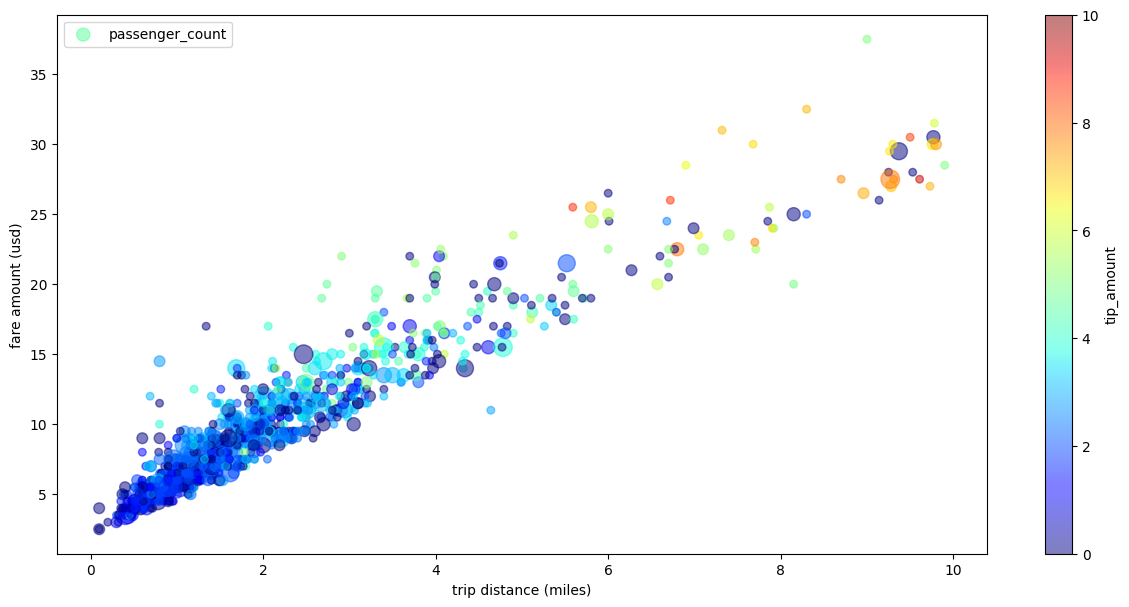

In [19]:

taxi_trips['passenger_count_scaled'] = taxi_trips['passenger_count'] * 30

taxi_trips.plot.scatter(
    x='trip_distance', 
    xlabel='trip distance (miles)',
    y='fare_amount', 
    ylabel ='fare amount (usd)',
    alpha=0.5, 
    s='passenger_count_scaled', 
    label='passenger_count',
    c='tip_amount',
    cmap='jet',
    colorbar=True,
    legend=True,
    figsize=(15,7),
    sampling_n=1000)

# Visualize Large Dataset

BigQuery DataFrame downloads data to your local machine for visualization. The amount of datapoints to be downloaded is capped at 1000 by default. If the amount of datapoints exceeds the cap, BigQuery DataFrame will randomly sample the amount of datapoints equal to the cap.

You can override this cap by setting the `sampling_n` parameter when plotting graphs. For example:

<Axes: xlabel='date'>

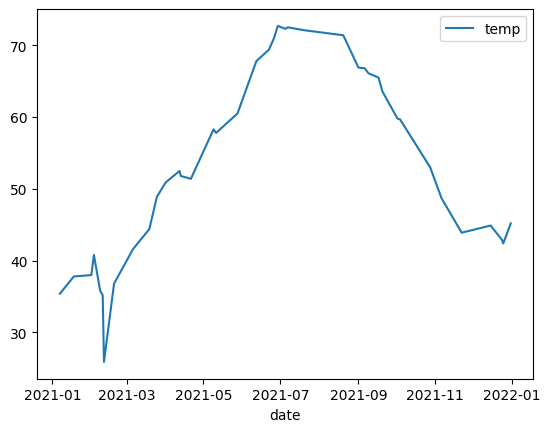

In [20]:
noaa_surface_median_temps.plot.line(sampling_n=40)

Note: `sampling_n` has no effect on histograms. This is because BigQuery DataFrame bucketizes the data on the server side for histograms. If your amount of bins is very large, you may encounter a "Query too large" error instead.